# Data Science in Psychology & Neuroscience (DSPN): 

## Lecture 14. Data Visualization (part 1)

### Date: October 11, 2022

### To-Dos From Last Class:

* Work on Assignment #3
* Install R
    
### Today:

* RStudio (.R, .Rmd)
* Tidyverse & ggplot
    * For additional reading, see <a href='https://r4ds.had.co.nz/'>R for Data Science</a> and <a href="https://www.moderndive.com/">Statistical Inference via Data Science</a>
* Play around with a sample dataset

### Homework

* Submit Assignment #3: <a href="https://www.dropbox.com/request/5tyrxS7O80R8XD2qLbx5">Data Wrangling</a> (before 10/13, 23:00 MDT)

# RStudio

* R is a language, RStudio is an Integrated Development Environment (IDE)
    * R : RStudio :: Python : Spyder

<img src='img/r_vs_rstudio.png' width='600'>

## Rmarkdown

* .R files --> Basic R scripts written and executed in RStudio
* .Rmd files --> RMarkdown files merging markdown and code chunks (similar to Jupyter)

# What is `tidyverse`?

## Definition

* Set of R packages
    * Includes ggplot, dplyr, tidyr, etc.
* All packages share an underlying design philosophy, grammar, and data structures.
    * <a href="https://www.tidyverse.org">For more info</a>
    
## Why do I use it?

* ggplot
* Most of the inferential modeling I do is in R
    * Nearly all of these modeling functions play nicely with tidy data frames


# Wading into the tidyverse...

## Reading in and interpreting a simple dataset

* Dataset contains the body mass index (BMI) of 1786 people, together with the number of steps each of them took on a particular day.
* Stored in two files: one for men, one for women.

## Step #1:
* Reading in the data
    * Coding biological sex as a variable
    * Merging the data frames

In [1]:
# loading the tidyverse
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
# setting up our filepaths and filenames

# PATH
data_dir <- '/Users/jeremyhogeveen/Dropbox/Fall_2022/teaching/DSPN/DSPN_Fall2022_Git/misc_exercises/data_visualization_exercise1'

# filenames
female_data <- paste(data_dir,'data9b_w.txt',sep='/')
male_data <- paste(data_dir,'data9b_m.txt',sep='/')

In [10]:
# reading in the data and merging into a single DF

# fem_df <- read_tsv(female_data)
# fem_df <- mutate(fem_df,Sex = 2)

fem_df <- read_tsv(female_data) %>%
    mutate(Sex=2)
male_df <- read_tsv(male_data) %>%
    mutate(Sex=1)

#merging the data frames together
df <- bind_rows(fem_df,male_df)
print(df)


── Column specification ────────────────────────────────────────────────────────
cols(
  ID = col_double(),
  steps = col_double(),
  bmi = col_double()
)


── Column specification ────────────────────────────────────────────────────────
cols(
  ID = col_double(),
  steps = col_double(),
  bmi = col_double()
)



# A tibble: 1,786 × 4
      ID steps   bmi   Sex
   <dbl> <dbl> <dbl> <dbl>
 1     3 15000  17       2
 2     4 14861  17.2     2
 3     5 14861  17.2     2
 4     9 14699  16.8     2
 5    12 14560  20.4     2
 6    14 14560  20.5     2
 7    15 14560  20.5     2
 8    16 14560  20.5     2
 9    21 14560  19.7     2
10    23 14560  19.6     2
# … with 1,776 more rows


## Step #2:
* Testing whether there is a statistically significant difference in the average number of steps taken by men and women
    * Run a t-test
    * Plot in a boxplot


	Welch Two Sample t-test

data:  steps by Sex
t = 6.8441, df = 1778, p-value = 1.055e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  800.9513 1444.3903
sample estimates:
mean in group 1 mean in group 2 
       8013.908        6891.237 



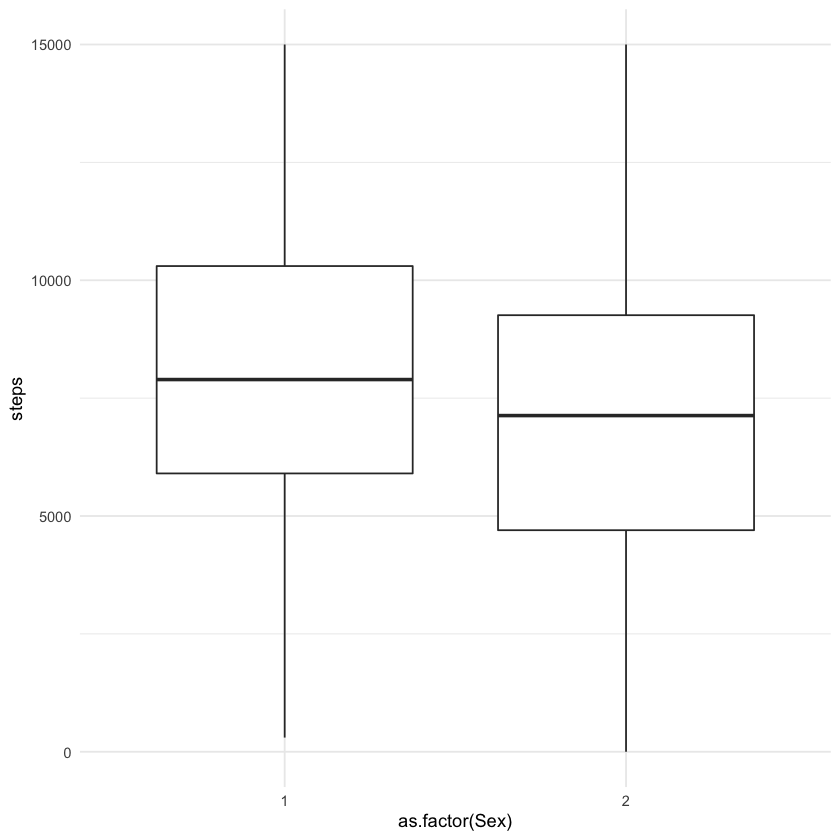

In [15]:
# hypothesis #1:
print(mod_hyp1 <- t.test(steps~Sex,df))

#plot the data in a boxplot by group
ggplot(df,aes(x = as.factor(Sex), y = steps)) +
    geom_boxplot() + 
    theme_minimal()


## Step #3:
* Testing that there is a negative correlation between the number of steps and the BMI for women
    * Run a cor test

In [16]:
# hypothesis #2: 
print(mod_hyp2 <- cor.test(fem_df$steps,fem_df$bmi))
print('Hypothesis #2 --> Supported by the data')


	Pearson's product-moment correlation

data:  fem_df$steps and fem_df$bmi
t = -9.968, df = 919, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3695032 -0.2528646
sample estimates:
       cor 
-0.3123607 

[1] "Hypothesis #2 --> Supported by the data"


## Step #4:
* Testing that the correlation between steps and BMI is positive for men
    * Run a cor test

In [17]:
# hypothesis #3: 
print(mod_hyp3 <- cor.test(male_df$steps,male_df$bmi))
print('Hypothesis #3 --> NOT supported by the data')


	Pearson's product-moment correlation

data:  male_df$steps and male_df$bmi
t = -6.9541, df = 863, p-value = 7.006e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2925195 -0.1662485
sample estimates:
       cor 
-0.2303534 

[1] "Hypothesis #3 --> NOT supported by the data"


# Step #5:

* Visualizing the data

`geom_smooth()` using formula 'y ~ x'



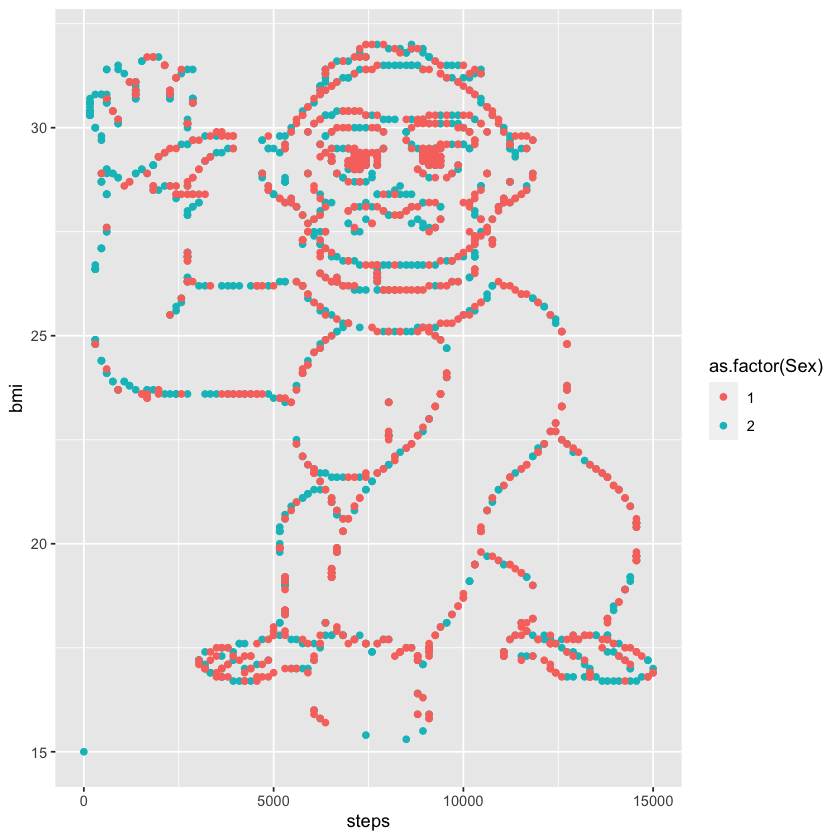

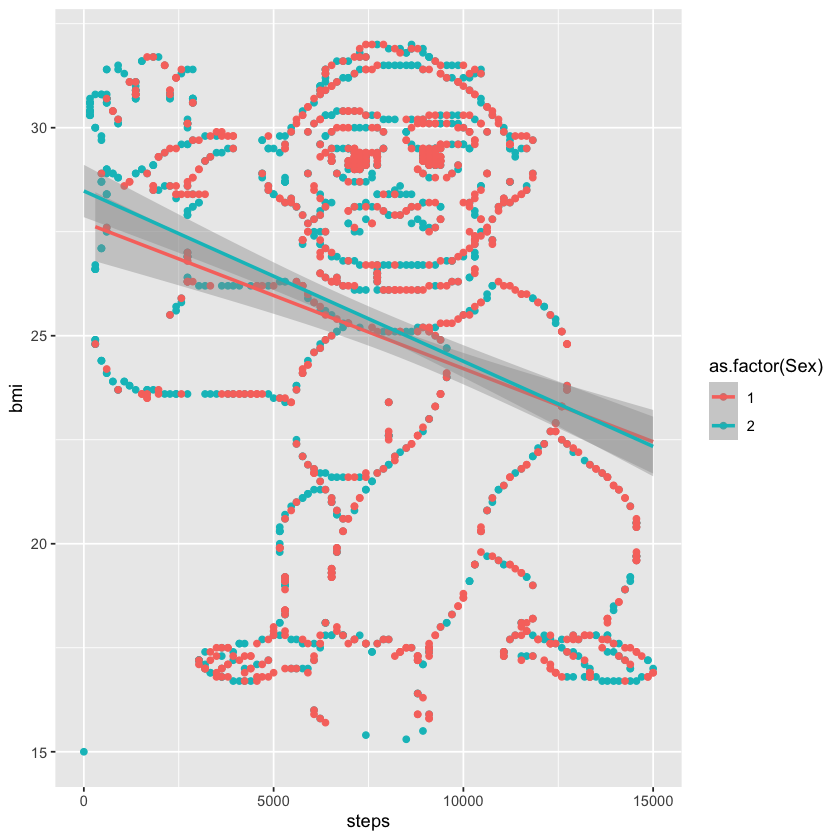

In [24]:
ggplot(df,aes(x = steps, y = bmi, color = as.factor(Sex))) + 
       geom_point()

ggplot(df,aes(x = steps, y = bmi, color = as.factor(Sex))) + geom_point() + 
geom_smooth(method=lm)

# Lesson: Step #5 should've been Step #1

# Example courtesy:

* Yanai, I., & Lercher, M. (2020). <a href='https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w'>A hypothesis is a liability.</a>